In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', -1)
pd.set_option('display.expand_frame_repr', False)

In [3]:
deliveries = pd.read_csv('Desktop\MAS\DATASET\MAS-ACA-Masterclass-main\MAS-ACA-Masterclass-main\CSV Files\deliveries_updated.csv')
matches = pd.read_csv('Desktop\MAS\DATASET\MAS-ACA-Masterclass-main\MAS-ACA-Masterclass-main\CSV Files\matches_updated_mens_ipl.csv')

In [4]:
df = deliveries.copy()
mdf = matches.copy()

In [5]:
main_df = pd.merge(df, mdf, on = 'matchId', how = 'left')

In [6]:
main_df.head(10)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
5,1082591,1,0.6,0,6,Sunrisers Hyderabad,Royal Challengers Bangalore,S Dhawan,DA Warner,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
6,1082591,1,0.7,0,7,Sunrisers Hyderabad,Royal Challengers Bangalore,S Dhawan,DA Warner,TS Mills,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
7,1082591,1,1.1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,S Dhawan,DA Warner,A Choudhary,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
8,1082591,1,1.2,1,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,A Choudhary,4,0,NaN,NaN,NaN,NaN,Na

In [7]:
def balls_played(isWide):
    if isWide >= 1 :
        return 0
    else:
        return 1


In [8]:
main_df['balls_faced'] = main_df.apply(lambda x: balls_played(x['isWide']), axis =1)

In [9]:
main_df[main_df['isNoBall'] >= 1].head(11)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,balls_faced
9,1082591,1,1.3,1,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,A Choudhary,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1
182,1082591,2,9.1,9,1,Royal Challengers Bangalore,Sunrisers Hyderabad,KM Jadhav,TM Head,MC Henriques,1,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1
1440,1082597,1,2.3,2,3,Kolkata Knight Riders,Mumbai Indians,CA Lynn,G Gambhir,JJ Bumrah,1,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-09,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,S Chaturvedi,2017,Kolkata Knight Riders,NaN,6,N Rana,NaN,NaN,Wankhede Stadium,NaN,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,7.0,NaN,4.0,1
1443,1082597,1,2.6,2,6,Kolkata Knight Riders,Mumbai Indians,CA Lynn,G Gambhir,JJ Bumrah,1,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-09,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,S Chaturvedi,2017,Kolkata Knight Riders,NaN,6,N Rana,NaN,NaN,Wankhede Stadium,NaN,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,7.0,NaN,4.0,1
1545,1082597,1,19.2,19,2,Kolkata Knight Riders,Mumbai Indians,MK Pandey,SP Narine,MJ McClenaghan,4,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-09,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,S Chaturvedi,2017,Kolkata Knight Riders,NaN,6,N Rana,NaN,NaN,Wankhede Stadium,NaN,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,7.0,NaN,4.0,1
2192,1082600,1,12.4,12,4,Sunrisers Hyderabad,Mumbai Indians,S Dhawan,DJ Hooda,KH Pandya,1,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-12,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,M Nayyar,2017,Sunrisers Hyderabad,NaN,6,JJ Bumrah,NaN,NaN,Wankhede Stadium,NaN,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,10.0,NaN,4.0,1
2442,1082601,1,13.4,13,4,Kings XI Punjab,Kolkata Knight Riders,DA Miller,WP Saha,C de Grandhomme,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-13,male,N Pandit,Kolkata Knight Riders,Kolkata Knight Riders,NJ Llong,AJ Pycroft,2017,Kings XI Punjab,NaN,6,SP Narine,NaN,NaN,Eden Gardens,NaN,field,Kolkata,AY Dandekar,NaN,Kolkata Knight Riders,A Deshmukh,11.0,NaN,8.0,1
2443,1082601,1,13.5,13,5,Kings XI Punjab,Kolkata Knight Riders,DA Miller,WP Saha,C de Grandhomme,6,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-13,male,N Pandit,Kolkata Knight Riders,Kolkata Knight Riders,NJ Llong,AJ Pycroft,2017,Kings XI Punjab,NaN,6,SP Narine,NaN,NaN,Eden Gardens,NaN,field,Kolkata,AY Dandekar,NaN,Kolkata Knight Riders,A Deshmukh,11.0,NaN,8.0,1
2699,1082602,1,17.6,17,6,Royal Challengers Bangalore,Mumbai Indians,KM Jadhav,P Negi,JJ Bumrah,1,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-14,male,R Pandit,Royal Challengers Bangalore,Mumbai Indians,AK Chaudhary,Chinmay Sharma,2017,Mumbai Indians,NaN,6,KA Pollard,NaN,NaN,M Chinnaswamy Stadium,NaN,field,Bangalore,C Shamshuddin,NaN,Mumbai Indians,KN Ananthapadmanabhan,12.0,NaN,4.0,1
3357,1082605,1,6.4,6,4,Delhi Daredevils,Kin

In [10]:
main_df['date'] = pd.to_datetime(mdf['date'])

In [11]:
main_df['year'] = main_df['date'].dt.year

In [12]:
def balls_per_boundaries(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1
    
def balls_per_dismissals(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1
    
def get_phase(over):
    if over < 6:
        return 'PowerPlay'
    elif over < 15:
        return 'Middle'
    else:
        return 'Death'

In [13]:
main_df['phase'] = main_df['over'].apply(lambda x: get_phase(x))

In [14]:
def batsman_stats(main_df, current_phase):
    

    main_df = main_df[main_df.phase == current_phase]
    main_df.reset_index(inplace = True, drop = True)

    main_df['total_runs'] = main_df['batsman_runs'] + main_df['extras']
    main_df['IsDot'] = main_df['total_runs'].apply(lambda x : 1 if x == 0 else 0)
    main_df['IsOne'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 1 else 0)
    main_df['IsTwo'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 2 else 0)
    main_df['IsThree'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 3 else 0)
    main_df['IsFour'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 4 else 0)
    main_df['IsSix'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 6 else 0)
   
    runs = pd.DataFrame(main_df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs': 'runs'})
    balls = pd.DataFrame(main_df.groupby(['batsman'])['balls_faced'].sum()).reset_index().rename(columns = {'balls_faced': 'balls'})
    innings = pd.DataFrame(main_df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns ={'matchId':'innings'})
    dismissals = pd.DataFrame(main_df.groupby(['batsman'])['player_dismissed'].count().reset_index().rename(columns = {'player_dismissed':'dismissals'}))
    sixes = pd.DataFrame(main_df.groupby(['batsman'])['IsSix'].sum().reset_index().rename(columns = {'IsSix':'sixes'}))
    fours = pd.DataFrame(main_df.groupby(['batsman'])['IsFour'].sum().reset_index().rename(columns = {'IsFour':'fours'}))
    dots = pd.DataFrame(main_df.groupby(['batsman'])['IsDot'].sum()).reset_index().rename(columns = {'IsDot': 'dots'})

    main_df = pd.merge(innings, runs, on = 'batsman').merge(balls, on ='batsman').merge(dots, on ='batsman').merge(dismissals, on ='batsman').merge(fours, on ='batsman').merge(sixes, on ='batsman')
    
    main_df['RPI'] = main_df.apply(lambda x: (x['runs']/x['innings']), axis = 1)
    main_df['SR'] = main_df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
    main_df['BPB'] = main_df.apply(lambda x: balls_per_boundaries (x['balls'], (x['sixes'] + x['fours'])), axis = 1)
    main_df['BPD'] = main_df.apply(lambda x: balls_per_dismissals(x['balls'], x['dismissals']), axis = 1)
    main_df['Dot%'] = main_df.apply(lambda x: 100*(x['dots']/x['balls']), axis = 1)
    main_df['Dot'] = main_df.apply(lambda x: x['dots'], axis = 1)
    
    return main_df

In [15]:
pp_df = batsman_stats(main_df, 'PowerPlay')
m_df = batsman_stats(main_df, 'Middle')
d_df = batsman_stats(main_df, 'Death')

In [16]:
pp_df = pp_df[pp_df.innings >= 20]
pp_df.reset_index(inplace = True, drop = True)

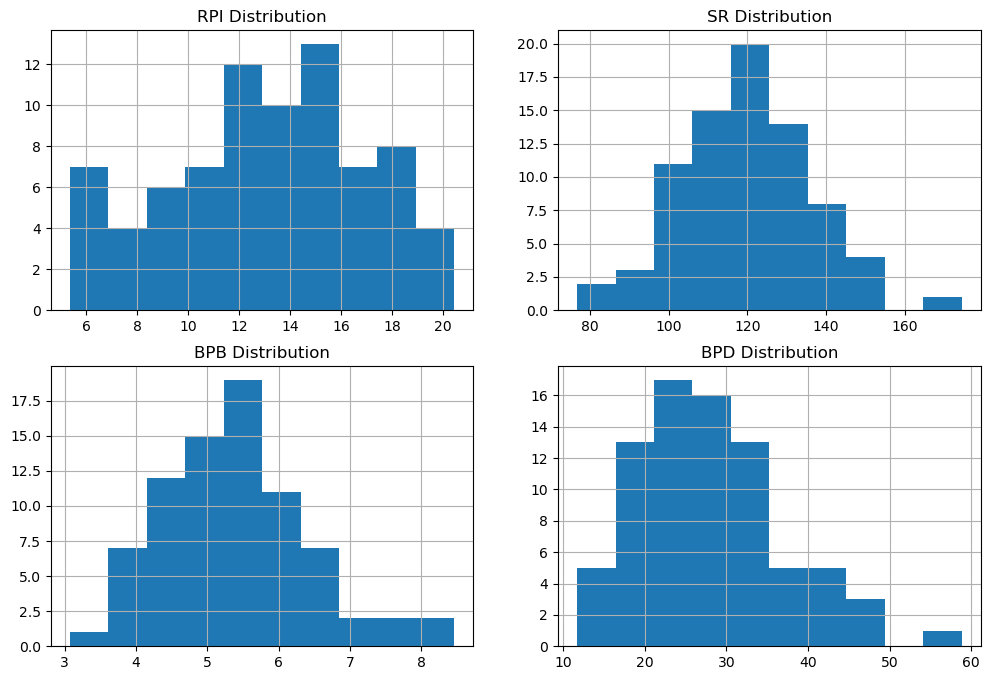

In [17]:
plt.figure(figsize = (12,8))

plt.subplot(221)
pp_df.RPI.hist()
plt.title('RPI Distribution')

plt.subplot(222)
pp_df.SR.hist()
plt.title('SR Distribution')

plt.subplot(223)
pp_df.BPB.hist()
plt.title('BPB Distribution')

plt.subplot(224)
pp_df.BPD.hist()
plt.title('BPD Distribution')
          
plt.show()

In [18]:
wt_sr, wt_rpi, wt_bpd, wt_bpb = 0.26, 0.25, 0.12, 0.38

In [19]:
pp_df['calc_SR'] = pp_df['SR'].apply(lambda x: x*x)
pp_df['calc_RPI'] = pp_df['RPI'].apply(lambda x: x*x)
pp_df['calc_BPB'] = pp_df['BPB'].apply(lambda x: x*x)
pp_df['calc_BPD'] = pp_df['BPD'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpb, sq_bpd = np.sqrt(pp_df[['calc_SR', 'calc_RPI', 'calc_BPB', 'calc_BPD']].sum(axis = 0))

pp_df['calc_SR'] = pp_df['calc_SR'].apply(lambda x: x/sq_sr)
pp_df['calc_RPI'] = pp_df['calc_RPI'].apply(lambda x: x/sq_rpi)
pp_df['calc_BPB'] = pp_df['calc_BPB'].apply(lambda x: x/sq_bpb)
pp_df['calc_BPD'] = pp_df['calc_BPD'].apply(lambda x: x/sq_bpd)

pp_df['calc_SR'] = pp_df['calc_SR'].apply(lambda x: x*wt_sr)
pp_df['calc_RPI'] = pp_df['calc_RPI'].apply(lambda x: x*wt_rpi)
pp_df['calc_BPB'] = pp_df['calc_BPB'].apply(lambda x: x*wt_bpb)
pp_df['calc_BPD'] = pp_df['calc_BPD'].apply(lambda x: x*wt_bpd)

best_sr, worst_sr = max(pp_df['calc_SR']), min(pp_df['calc_SR'])
best_rpi, worst_rpi = max(pp_df['calc_RPI']), min(pp_df['calc_RPI'])
best_bpb, worst_bpb = max(pp_df['calc_BPB']), min(pp_df['calc_BPB'])
best_bpd, worst_bpd = min(pp_df['calc_BPD']), max(pp_df['calc_BPD'])



In [20]:
pp_df['dev_best_SR'] = pp_df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr))
pp_df['dev_best_RPI'] = pp_df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi))
pp_df['dev_best_BPB'] = pp_df['calc_BPB'].apply(lambda x: (x-best_bpb)*(x-best_bpb))
pp_df['dev_best_BPD'] = pp_df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd))

pp_df['dev_best_sqrt'] = pp_df.apply(lambda x: x['dev_best_SR']+ x['dev_best_RPI']+ x['dev_best_BPB']+ x['dev_best_BPD'], axis = 1)

pp_df['dev_worst_SR'] = pp_df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr))
pp_df['dev_worst_RPI'] = pp_df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi))
pp_df['dev_worst_BPB'] = pp_df['calc_BPB'].apply(lambda x: (x-worst_bpb)*(x-worst_bpb))
pp_df['dev_worst_BPD'] = pp_df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd))

pp_df['dev_worst_sqrt'] = pp_df.apply(lambda x: x['dev_worst_SR']+ x['dev_worst_RPI']+ x['dev_worst_BPB']+ x['dev_worst_BPD'], axis = 1)


In [21]:
pp_df['score'] = pp_df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [22]:
pp_df[['batsman', 'innings', 'runs', 'balls', 'dismissals', 'dots', 'fours', 'sixes', 'SR', 'BPB', 'score', ]].sort_values(['score'], ascending = False).reset_index(drop = True)

,batsman,innings,runs,balls,dismissals,dots,fours,sixes,SR,BPB,score
0,SP Narine,39,654,375,32,163,85,37,174.400000,3.073770,0.991788
1,E Lewis,20,409,272,11,122,47,21,150.367647,4.000000,0.831021
2,JC Buttler,45,856,576,19,243,114,35,148.611111,3.865772,0.795989
3,PP Shaw,53,912,622,34,254,124,28,146.623794,4.092105,0.771792
4,YK Pathan,33,361,245,12,107,47,16,147.346939,3.888889,0.768005
5,V Sehwag,103,1593,1105,60,452,230,46,144.162896,4.003623,0.725123
6,CA Lynn,40,779,540,17,251,99,37,144.259259,3.970588,0.719970
7,RA Tripathi,40,641,452,20,183,80,23,141.814159,4.388350,0.680273
8,JM Bairstow,27,514,364,12,159,63,21,141.208791,4.333333,0.664976
9,ST Jayasuriya,30,514,366,20,184,61,27,140.437158,4.159091,0.660837
